# Handwritten digit recognition

## Miguel Ángel Canela, IESE Business School

******

### Introduction

This example deals with the classification of grayscale images of handwritten digits (28 pixels by 28 pixels), into 10 classes (0 to 9). The data set used is the **MNIST data set**, a classic in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It is a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (NIST) in the 1980s. You can think of "solving" MNIST as the "Hello World" of deep learning, that is, what you do to verify that your algorithms are working as expected. As you become a machine learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.


### Importing the data

Since the original data set was too big to be posted on GitHub in CSV format, it has been partitioned into seven subsets. I import these subsets one by one (this can take a bit, depending on your connection).

In [1]:
import pandas as pd
folder = 'https://raw.githubusercontent.com/mcanela-iese/ML_Course/master/Data/'
df1 = pd.read_csv(folder + 'digits1.csv')
df2 = pd.read_csv(folder + 'digits2.csv')
df3 = pd.read_csv(folder + 'digits3.csv')
df4 = pd.read_csv(folder + 'digits4.csv')
df5 = pd.read_csv(folder + 'digits5.csv')
df6 = pd.read_csv(folder + 'digits6.csv')
df7 = pd.read_csv(folder + 'digits7.csv')

Now, I concatenate these data frames with the Pandas function `concat`. The argument `axis=0` means that they are concatenated vertically.

In [2]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=0)

I check that the shape of the data set is as expected.

In [3]:
df.shape

(70000, 785)

Every row in this data set stands for an image. Let us explore the columns.

In [4]:
df.iloc[:, :10].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 9999
Data columns (total 10 columns):
label    70000 non-null int64
X1x1     70000 non-null int64
X1x2     70000 non-null int64
X1x3     70000 non-null int64
X1x4     70000 non-null int64
X1x5     70000 non-null int64
X1x6     70000 non-null int64
X1x7     70000 non-null int64
X1x8     70000 non-null int64
X1x9     70000 non-null int64
dtypes: int64(10)
memory usage: 5.9 MB


So, the first column must be a label identifying the digit, and the other 784 correspond to the image pixels (28 x 28 = 784). The name `Xixj` must be read as the gray intensity of the pixel in row `i` and column `j`. I split this into a **features matrix** and a **target vector** as usual.

In [5]:
import numpy as np
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

The contents of the target vector are the 10 digit labels. The data set is a bit unbalanced.

In [6]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))

The contents of the feature matrix are integers from 0 to 255, which stand for gray intensities (8-bit grayscale), from Black = 0 to White = 255.

In [7]:
np.unique(X)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

These data are typically normalized into the 0-1 range, so I do it, even if it is not needed for the actual purpose of this example. 

In [8]:
X = X/255

Digit recognition is a **multi-class** classification problem. Since that task calls for a model with some complexity, it is safer to set a test set for **validation** purposes. I follow the tradition of using 10,000 images of the MNIST data set for testing. For the split, I use the scikit-learn class `model_selection.train_test_split`.  

In [9]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=1/7)

### Plotting an image

Before addressing the classification task, let me show you what these images are. Images can be plotted with Matplotlib in a very easy way. I start importing the module `pyplot` as usual.

In [10]:
import matplotlib.pyplot as plt

There are many ways to specify that we want a black and white picture. One of them is to set: 

In [11]:
plt.gray()

<Figure size 432x288 with 0 Axes>

Each row of our features matrix corresponds to a 28 x 28 image. I have to reshape it into a matrix of 28 rows and 28 columns. In NumPy, this is easily done with the function `reshape`. The matrix returned is written row by row.

In [12]:
pic = X[0, :].reshape(28,28)
pic.shape

(28, 28)

In `pyplot`, the function `imshow` renders the image, in black and white, due to the above specification.

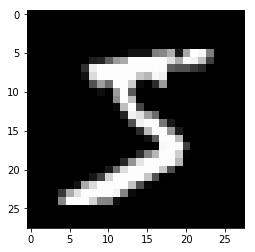

In [13]:
plt.imshow(pic)
plt.show()

Note that `pic` is a matrix of numbers in the 0-1 range, so we can get easily get the negative. This evoques the number as written by a pencil on a white sheet of paper. 

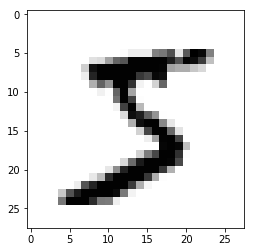

In [14]:
plt.imshow(1-pic)
plt.show()

### Decision tree classifier

I start with a **decision tree classifier**. I use the scikit-learn class `tree.DecisionTreeClassifier`, setting the maximum number of leaves at 128 ($2^7=128$). 

In [15]:
from sklearn import tree
treeclf = tree.DecisionTreeClassifier(max_leaf_nodes=128)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=128,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

I evaluate the model by means of the accuracy. Since there are 10 digits, the **baseline accuracy**, obtained by guessing at random, is about 10%.

In [16]:
round(treeclf.score(X_train, y_train), 3)

0.805

The validation on the test set shows an acceptable degree of overfitting. You can improve the accuracy a bit with a bigger tree, but the validation becomes less convincing.

In [17]:
round(treeclf.score(X_test, y_test), 3)

0.791

### Random forest classifier

**Ensemble methods** are available in the scikit-learn module `ensemble`. The classes `RandomForestClassifier` and `RandomForestRegressor` provide **random forest** algorithms, which combine a collection of decision trees to improve the predictions. To train a random forest classifier with the MNIST data, I keep the size of the tree used above. If you try other values for the arguments of `RandomForestClassifier`, you will find that the number of leaves (`max_leaf_nodes`) matters more than the number of trees (`n_estimators`). 

In [18]:
from sklearn import ensemble
rfclf = ensemble.RandomForestClassifier(max_leaf_nodes=128, n_estimators=10)
rfclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=128,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

So far, the forest improves significantly the performance of a single tree, with no symptoms of overfitting (in general, random forest models are less prone to overfitting than their competitors).

In [19]:
round(rfclf.score(X_train, y_train), 3)

0.902

In [20]:
round(rfclf.score(X_test, y_test), 3)

0.897

### Gradient boosting classifier

The **gradient boosting** algorithm is used in both regression and classification. As the random forest algorithm, it is an ensemble method, which derives its predictions from a collection of decision trees. There is a difference between the random forest and the gradient boosting methods. The trees of the random forest are independent but, in the gradient boosting method, they are developed sequentially, which makes the learning process much slower. 

In scikit-learn, the class `ensemble.GradientBoostingClassifier` can be used to develop a gradient boosting classifier. But, instead of the scikit-learn library, I use here the class `XGBClassifier`, from the `xgboost` module. The growth of the trees is controlled in `XGBClassifier` as in scikit-learn. The default is `max_depth=3`. I keep the defaults of `n_estimators` and `learning_rate`, which makes sense for a first experience. This may take one hour in your computer, so you have time for lunch. If you want to speed it, you can decrease the number of trees, but this will affect the accuracy of the model. 

In [21]:
import xgboost as xgb

In [22]:
xgbclf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgbclf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

With the default specification, gradient boosting improves the results of the random forest, although it comes with a shade of overfitting.

In [23]:
round(xgbclf.score(X_train, y_train), 3)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.945

In [24]:
round(xgbclf.score(X_test, y_test), 3)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.936

### Dimensionality reduction

I explore next whether all this can work after a **dimensionality reduction**. In scikit-learn, the module `decomposition` provides several methods for dimensionality reduction. I apply the **principal components analysis** (PCA) algorithm, which extracts a new, smaller, set of features by means of a linear transformation. PCA is available in the class `PCA`.

I set the number of components (the new features) at 25, which is drastic reduction. Note that this is **unsupervised learning**, so the method `fit` requires one argument, not two.

In [25]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=25)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Every component accounts for a certain proportion of the total variance. They come sorted by that proportion. We get this with the method `explained_variance_ratio_`.

In [26]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445, 0.06149531, 0.05403385, 0.04888934,
       0.04305227, 0.03278262, 0.02889642, 0.02758364, 0.0234214 ,
       0.02106689, 0.02037553, 0.01707064, 0.0169402 , 0.01583382,
       0.01486345, 0.01319356, 0.01278988, 0.01187257, 0.01152926,
       0.0106594 , 0.01009617, 0.0095898 , 0.00908934, 0.00883205])

The cumulative proportion helps to see whether we are right retaining a number of components. Here, 25 components account for 69% of the total variance.  

In [27]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09746116, 0.16901561, 0.23051091, 0.28454476, 0.3334341 ,
       0.37648637, 0.40926898, 0.4381654 , 0.46574904, 0.48917044,
       0.51023733, 0.53061286, 0.5476835 , 0.5646237 , 0.58045752,
       0.59532097, 0.60851452, 0.6213044 , 0.63317697, 0.64470624,
       0.65536563, 0.66546181, 0.67505161, 0.68414095, 0.692973  ])

The method `transform` creates a new training set and a new test set, with 25 columns.

In [28]:
PC_train = pca.transform(X_train)
PC_train.shape

(60000, 25)

In [29]:
PC_test = pca.transform(X_test)
PC_test.shape

(10000, 25)

### The decision tree classifier revisited

I develop now a decision tree classifier based on the PC features, to examine how the dimensionality reduction has affected the performance. I do not the constraint for the tree growth, so `treeclf` has the same meaning as before.

In [30]:
treeclf.fit(PC_train, y_train)
round(treeclf.score(PC_train, y_train), 3)

0.801

In [31]:
round(treeclf.score(PC_test, y_test), 3)

0.785

So, the accuracy loss is mere 1% (it can be a bit more if you are unlucky with your test set).

### The random forest classifier revisited

I repeat the exercise with the random forest classifier. Now the accuracy loss looks more relevant. It may be that having less room for choosing the features involved in every tree affects the performance of the random forest more than when we have a single tree and we can pick all the available features. By increasing the number of trees, you can improve the current accuracy one or two points.

In [32]:
rfclf = ensemble.RandomForestClassifier(max_leaf_nodes=128, n_estimators=10)
rfclf.fit(PC_train, y_train)
round(rfclf.score(PC_train, y_train), 3)

0.867

In [33]:
round(rfclf.score(PC_test, y_test), 3)

0.856

### The gradient boosting classifier revisited

We come back now to the gradient boosting classifier. Again, this will take a while, almost one hour in my Mac. There is a loss of accuracy, similar to that of the random forest. 

In [34]:
xgbclf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgbclf.fit(PC_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [35]:
round(xgbclf.score(PC_train, y_train), 3)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.917

In [36]:
round(xgbclf.score(PC_test, y_test), 3)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.902